# Microring
Eventually, this should turn into a laser.

Goals are to determine what is due to Purcell enhancement vs. scattering?

### Gain
- two level atom with transition at 1218 (not the sideband)

### Maxwell
- rotational symmetry, unless we want to do waveguide coupling
- simpler: 2D side view with reflection symmetry (is this actually faster)?
- can we look at the far field?

### Questions
- what is Harminv

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import shutil

import meep as mp

import sys
sys.path.append('../../lib')
from meep_nb import *

from lightlab.util import io
import argparse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
io.fileDir = io.dataHome / 'microresonators'
_ = io.pprintFileDir()

## Define the cylindrical simulator

In [3]:
from default_geometries import give_1d_microring_geometry

def give_sim(geometry=None, fcen=0.15, m=3, src_r=1, dpml=32):
    # m is rotational periods
    if geometry is None:
        geometry = give_1d_microring_geometry(r=10)
    sr = geometry[0].size.x + dpml
    cell = mp.Vector3(sr, 0, 0)
    dimensions = mp.CYLINDRICAL

    pml_layers = [mp.PML(dpml)]
    resolution = 20

    df = fcen * 2/3
    
    # source must be rotationally symmetric too
    sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df),
                         component=mp.Ez,
                         center=mp.Vector3(src_r + 0.1))]

    sim = mp.Simulation(cell_size=cell,
                        geometry=geometry,
                        boundary_layers=pml_layers,
                        resolution=resolution,
                        sources=sources,
                        dimensions=dimensions,
                        m=m,
                       )
    return sim, fcen, df

## First find the modes of a microring
This is adapted from `ring_cyl.py`

-----------
Initializing structure...
Meep: using complex fields.
run 0 finished at t = 0.1 (4 timesteps)
harminv1:, frequency, imag. freq., Q, |amp|, amplitude, error
run 1 finished at t = 300.0 (12000 timesteps)
run 2 finished at t = 306.675 (12267 timesteps)


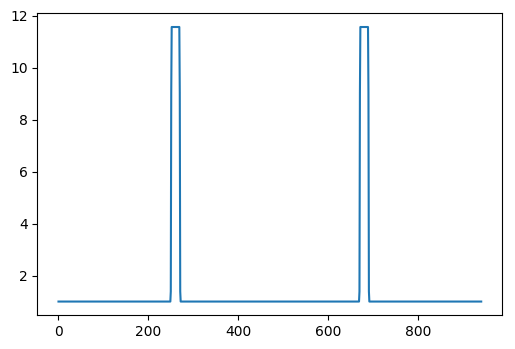

In [4]:
# Run it to find the resonant frequency
sim, fcen, df = give_sim()
show_geometry(sim)
sim.run(mp.after_sources(mp.Harminv(mp.Ez, mp.Vector3(1 + 0.1), fcen, df)),
        until_after_sources=200)

sim.run(mp.in_volume(mp.Volume(center=mp.Vector3(), size=mp.Vector3(2 * sim.cell_size.x)), # both sides
                     mp.at_beginning(mp.output_epsilon),
                     mp.to_appended("ez", mp.at_every(1 / fcen / 20, mp.output_efield_z))),
        until=1 / fcen)  # one period

In [ ]:
## Now do it at 1220

In [ ]:
# Run it to find the resonant frequency
geo = give_1d_microring_geometry(r=5)
sim = give_sim(src_r=5.1, f_cen=1/1.18, m=)
show_geometry(sim)
sim.run(until=0.1)
# sim.run(mp.after_sources(mp.Harminv(mp.Ez, mp.Vector3(r + 0.1), fcen, df)),
#         until_after_sources=200)

# sim.run(mp.in_volume(mp.Volume(center=mp.Vector3(), size=mp.Vector3(2 * sr)), # both sides
#                      mp.at_beginning(mp.output_epsilon),
#                      mp.to_appended("ez", mp.at_every(1 / fcen / 20, mp.output_efield_z))),
#         until=1 / fcen)  # one period